Name: Joshua Olando

Course: IST 652

Date: 11 Dec 2024

Final Project

The overall method of this code is to retrieve the three data files, clean and organize the data, and then develop scripts to answer questions identified in the project report.

1. Retrieve the Data

In [5]:
'''
Code to retrieve Chronic Kidney Data Set from UC Irvine Repository
'''
#UC Irvine has a package install that fetches data sets from their repository. Uncomment below if package has not been installed.
#!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
dataset = fetch_ucirepo(id=336)

In [6]:
'''
Code to upload Kidney Failure Risk Equation Data CSV file
'''
import pandas as pd
dfcsv = pd.read_csv("kfre_plosmed_v2_0.csv")

In [ ]:
'''
Code to retrieve U.S. Chronic Disease Indicators data set
'''
import urllib.request
import json
import pymongo

json_url = "https://data.cdc.gov/api/views/g4ie-h725/rows.json?accessType=DOWNLOAD"

# try/except statement if an error to the website occurs.
try:
    response = urllib.request.urlopen(json_url)
except urllib.error.URLError as e:
    if hasattr(e, 'reason'):
        print('We failed to reach a server.')
        print('Reason: ', e.reason)
    elif hasattr(e, 'code'):
        print('The server couldn\'t fulfill the request.')
        print('Error code: ', e.code)
else:
    # the url request was successful - convert the response to a string
    json_string = response.read().decode('utf-8')

# loads() function form the JSON package converts the string to python dictionaries and lists
eq_json = json.loads(json_string)

# from the json dictionary we get the title to print
title = eq_json['meta']['view']['name']
print('Collected data from', title)
#  put it in a list
umci_list = eq_json['data']
print(len(umci_list))

Collected data from U.S. Chronic Disease Indicators (CDI), 2023 Release
1185676


2. Clean

In [7]:
'''
Steps for cleaning and preparing the data for Chronic Kidney Disease into a pandas data frame
'''
#To put the data set into a data frame, ucimlrepo uses data.features for independent variables
#and data.target for the dependent variable (how the ucimlrepo package works).
ivar = dataset.data.features
dvar = dataset.data.targets
#use merge to combine ivar and dvar into one data frame df
dfuci = pd.merge(ivar, dvar, left_index=True, right_index=True)

#use .info() to see total entries and non-null entries in each column.
dfuci.info()

#use .desribe() to calculate some descriptive statistics on columns with numeric values.
dfuci.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [8]:
'''
Code to clean and put Kidney Failure Risk Equation Data into a pandas data frame
'''
dfcsv.info()
dfcsv.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35539 entries, 0 to 35538
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          35539 non-null  int64  
 1   age         35539 non-null  int64  
 2   epi_egfr    35539 non-null  float64
 3   death       35539 non-null  int64  
 4   female      35539 non-null  int64  
 5   esrd        35539 non-null  int64  
 6   acr_mgmmol  35539 non-null  float64
 7   time        35539 non-null  int64  
 8   dm          35539 non-null  int64  
 9   hf          35539 non-null  int64  
 10  cvd         35539 non-null  int64  
 11  htn         35539 non-null  int64  
 12  neph_known  17077 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 3.5 MB


,id,age,epi_egfr,death,female,esrd,acr_mgmmol,time,dm,hf,cvd,htn,neph_known
count,35539.000000,35539.000000,35539.000000,35539.000000,35539.000000,35539.000000,35539.000000,35539.000000,35539.000000,35539.000000,35539.000000,35539.000000,17077.000000
mean,17770.000000,75.934804,48.241978,0.265821,0.575030,0.015982,11.777692,1736.662765,0.314950,0.089789,0.320099,0.698753,0.073022
std,10259.369945,10.609232,9.834607,0.441775,0.494345,0.125409,40.851002,929.573009,0.464502,0.285883,0.466521,0.458806,0.260181
min,1.000000,16.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8885.500000,70.000000,43.000000,0.000000,0.000000,0.000000,1.200000,1010.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17770.000000,77.000000,51.000000,0.000000,1.000000,0.000000,3.200000,1720.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26654.500000,83.000000,56.000000,1.000000,1.000000,0.000000,8.000000,2413.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,35539.000000,104.000000,59.000000,1.000000,1.000000,1.000000,1325.600000,4423.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
'''
Code to clean and prepare U.S. Chronic Disease Indicators into a pandas data frame Part 1 
'''
import pandas as pd
import pymongo
import json


chronic_kidney_disease_list = []
for record in eq_json['data']:
  if record[13] == "Chronic Kidney Disease":
    chronic_kidney_disease_list.append(record)

print(len(chronic_kidney_disease_list))

column_names = [col['name'] for col in eq_json['meta']['view']['columns']]

# Convert the list of lists to a list of dictionaries
documents = []
for row in chronic_kidney_disease_list:
  document = dict(zip(column_names, row))
  documents.append(document)

# Connection to Mongo DB
try:
    client=pymongo.MongoClient('localhost', 27017)
    print ("Connected successfully!!!")
except pymongo.errors.ConnectionFailure as e:
   print ("Could not connect to MongoDB: %s" % e )
else:
    # use database named ckddb or create it if not there already
    ckddb = client.ckd
    # create collection named location or create it if not there already
    ckdcoll = ckddb.kidney

    ckdcoll.insert_many(documents)
    print("Added", len(documents), "to location collection in ckd database")
    # close the database connection
client.close()



24731
Connected successfully!!!
Added 24731 to location collection in ckd database


In [87]:
'''
Code to clean and prepare U.S. Chronic Disease Indicators into a pandas data frame Part 2
'''
import pandas as pd
from pandas import json_normalize
import pymongo
import json

client = pymongo.MongoClient('localhost', 27017)
ckddb = client.ckd
ckdcoll = ckddb.kidney


dfjson = pd.DataFrame(list(ckdcoll.find()))
client.close()

dfjson.info()
dfjson.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24731 entries, 0 to 24730
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   _id                        24731 non-null  object
 1   sid                        24731 non-null  object
 2   id                         24731 non-null  object
 3   position                   24731 non-null  int64 
 4   created_at                 24731 non-null  int64 
 5   created_meta               0 non-null      object
 6   updated_at                 24731 non-null  int64 
 7   updated_meta               0 non-null      object
 8   meta                       24731 non-null  object
 9   YearStart                  24731 non-null  object
 10  YearEnd                    24731 non-null  object
 11  LocationAbbr               24731 non-null  object
 12  LocationDesc               24731 non-null  object
 13  DataSource                 24731 non-null  object
 14  Topic 

,_id,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,675b0151533b6c71af70a3c6,row-c9im.za2p.ykea,00000000-0000-0000-8809-F11C5273F8B7,0,1675079585,None,1675079715,None,{ },2017,...,19,CKD,CKD1_0,NMBR,GENDER,GENM,None,None,None,None
1,675b0151533b6c71af70a3c7,row-c2a2~ru32_zg2a,00000000-0000-0000-0559-6BA3C335851D,0,1675079585,None,1675079718,None,{ },2014,...,39,CKD,CKD1_0,NMBR,GENDER,GENM,None,None,None,None
2,675b0151533b6c71af70a3c8,row-sby2_m65i_wjpm,00000000-0000-0000-CD8D-3F2DDB1B0F78,0,1675079585,None,1675079718,None,{ },2012,...,56,CKD,CKD1_0,NMBR,OVERALL,OVR,None,None,None,None
3,675b0151533b6c71af70a3c9,row-eud3_vkue~mg72,00000000-0000-0000-FEC2-EB7C7BCAE88E,0,1675079585,None,1675079718,None,{ },2015,...,56,CKD,CKD1_0,NMBR,OVERALL,OVR,None,None,None,None
4,675b0151533b6c71af70a3ca,row-uz9n_r8ga~wu3i,00000000-0000-0000-5B95-8392C76229F9,0,1675079585,None,1675079715,None,{ },2017,...,04,CKD,CKD1_0,NMBR,OVERALL,OVR,None,None,None,None


In [93]:
# These columns are not too meaningful. Removed from data set
dfjson_mod=dfjson.iloc[:, 9:]
dfjson_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24731 entries, 0 to 24730
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   YearStart                  24731 non-null  object
 1   YearEnd                    24731 non-null  object
 2   LocationAbbr               24731 non-null  object
 3   LocationDesc               24731 non-null  object
 4   DataSource                 24731 non-null  object
 5   Topic                      24731 non-null  object
 6   Question                   24731 non-null  object
 7   Response                   0 non-null      object
 8   DataValueUnit              20232 non-null  object
 9   DataValueType              24731 non-null  object
 10  DataValue                  18555 non-null  object
 11  DataValueAlt               18555 non-null  object
 12  DataValueFootnoteSymbol    6330 non-null   object
 13  DatavalueFootnote          6330 non-null   object
 14  LowCon

In [94]:
# Drop null columns by index
columns_to_drop = [7,18,19,20,21,23,30,31,32,33] 
dfjson_mod = dfjson_mod.drop(dfjson_mod.columns[columns_to_drop], axis=1)
dfjson_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24731 entries, 0 to 24730
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   YearStart                  24731 non-null  object
 1   YearEnd                    24731 non-null  object
 2   LocationAbbr               24731 non-null  object
 3   LocationDesc               24731 non-null  object
 4   DataSource                 24731 non-null  object
 5   Topic                      24731 non-null  object
 6   Question                   24731 non-null  object
 7   DataValueUnit              20232 non-null  object
 8   DataValueType              24731 non-null  object
 9   DataValue                  18555 non-null  object
 10  DataValueAlt               18555 non-null  object
 11  DataValueFootnoteSymbol    6330 non-null   object
 12  DatavalueFootnote          6330 non-null   object
 13  LowConfidenceLimit         13140 non-null  object
 14  HighCo

In [95]:
# Convert these values to numeric 
dfjson_mod['DataValue'] = pd.to_numeric(dfjson_mod['DataValue'], errors='coerce')
dfjson_mod['DataValueAlt'] = pd.to_numeric(dfjson_mod['DataValueAlt'], errors='coerce')
dfjson_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24731 entries, 0 to 24730
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  24731 non-null  object 
 1   YearEnd                    24731 non-null  object 
 2   LocationAbbr               24731 non-null  object 
 3   LocationDesc               24731 non-null  object 
 4   DataSource                 24731 non-null  object 
 5   Topic                      24731 non-null  object 
 6   Question                   24731 non-null  object 
 7   DataValueUnit              20232 non-null  object 
 8   DataValueType              24731 non-null  object 
 9   DataValue                  18555 non-null  float64
 10  DataValueAlt               18555 non-null  float64
 11  DataValueFootnoteSymbol    6330 non-null   object 
 12  DatavalueFootnote          6330 non-null   object 
 13  LowConfidenceLimit         13140 non-null  obj

In [97]:
dfjson_mod.to_csv('dfjson_mod.csv', index=False)

3. Scripts to Answer Questions form the Project Report

In [78]:
'''
a. Can I find a data set with eGFR and expand my analysis from the homework results?
'''

# neph_known
df_ckd_csv = dfcsv[dfcsv['neph_known'] == 1]
df_nockd_csv = dfcsv[dfcsv['neph_known'] == 0]

#create bin groups so I can later group by egfr median
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')] #bins labled for age. float('inf') is a place holder for infinity

#create new df for ckd by grouping age and egfr
df_ckd_csv_age = df_ckd_csv.copy()
df_ckd_csv_age['age_group'] = pd.cut(df_ckd_csv['age'], bins=bins, right=False) #cut() is a function in pandas to create histograms
                                                                           #right means should the right interval be closed/open
                                                                           #new column created based on cut() and bins
#create new df for no ckd by grouping age and egfr
df_nockd_csv_age = df_nockd_csv.copy()
df_nockd_csv_age['age_group'] = pd.cut(df_nockd_csv['age'], bins=bins, right=False)

#used groupby() to aggregate the two data frames
age_egfr_med_ckd = df_ckd_csv_age.groupby('age_group')['epi_egfr'].median()
age_egfr_med_nockd = df_nockd_csv_age.groupby('age_group')['epi_egfr'].median()

#reset index so I can later merge base on age_group
age_egfr_med_ckd = age_egfr_med_ckd.reset_index()
age_egfr_med_nockd= age_egfr_med_nockd.reset_index()

# Rename original column 'epi_egfr' to 'ckd_egfr_med' & 'no_ckd_egfr_med' for better clarity
age_egfr_med_ckd= age_egfr_med_ckd.rename(columns={'epi_egfr': 'ckd_egfr_med'})
age_egfr_med_nockd = age_egfr_med_nockd.rename(columns={'epi_egfr': 'nockd_egfr_med'})

# Merge the DataFrames based on the 'age_group' column
df_merged_egfr = pd.merge(age_egfr_med_ckd, age_egfr_med_nockd, on='age_group', how='outer')

# Display the merged DataFrame
print(df_merged_egfr)

      age_group  ckd_egfr_med  nockd_egfr_med
0   [0.0, 10.0)           NaN             NaN
1  [10.0, 20.0)          53.0             NaN
2  [20.0, 30.0)          44.0            53.0
3  [30.0, 40.0)          48.0            51.0
4  [40.0, 50.0)          46.0            54.0
5  [50.0, 60.0)          43.0            54.0
6  [60.0, 70.0)          43.5            54.0
7  [70.0, 80.0)          37.0            52.0
8  [80.0, 90.0)          31.0            48.0
9   [90.0, inf)          25.0            44.0


C:\Users\jrola\AppData\Local\Temp\ipykernel_524\3426018885.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_egfr_med_ckd = df_ckd_csv_age.groupby('age_group')['epi_egfr'].median()
C:\Users\jrola\AppData\Local\Temp\ipykernel_524\3426018885.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_egfr_med_nockd = df_nockd_csv_age.groupby('age_group')['epi_egfr'].median()


In [80]:
#output csv file for df_merged_egfr
df_merged_egfr.to_csv('df_merged_egfr.csv', index=False)

In [142]:
'''
b. Can I find other medical conditions that exist in the data set (i.e. hypertension or diabetes)?
'''
df_ckd_csv = dfcsv[dfcsv['neph_known'] == 1]
df_nockd_csv = dfcsv[dfcsv['neph_known'] == 0]

df_ckd_uci = dfuci[dfuci['class']=='ckd']
df_nockd_uci = dfuci[dfuci['class']=='notckd']

# Yes percentages of hypertension in patients with ckd and not ckd between CSV data set and UCI data set 
yes_perc_htn_ckd_csv = df_ckd_csv['htn'].value_counts().get(1, 0)/len(df_ckd_csv['htn'])*100
print(f'{yes_perc_htn_ckd_csv:.1f}% of the patients with CKD have hypertension in the CSV data file')
yes_perc_htn_nockd_csv = df_nockd_csv['htn'].value_counts().get(1, 0)/len(df_nockd_csv['htn'])*100
print(f'{yes_perc_htn_nockd_csv:.1f}% of the patients without CKD have hypertension in the CSV data file')

yes_perc_htn_ckd_uci = df_ckd_uci['htn'].value_counts().get('yes', 0)/len(df_ckd_uci['htn'])*100
print(f'{yes_perc_htn_ckd_uci:.1f}% of the patients with CKD have hypertension in the UCI data set')
yes_perc_htn_nockd_uci = df_nockd_uci['htn'].value_counts().get('yes', 0)/len(df_nockd_uci['htn'])*100
print(f'{yes_perc_htn_nockd_uci:.1f}% of the patients without CKD have hypertension in the UCI data set')

print() # Added a space between the two so it's easier to read in the output

# Yes percentages of diabetes in patients with ckd and not ckd between CSV data set and UCI data set 
yes_perc_htn_ckd_csv = df_ckd_csv['dm'].value_counts().get(1, 0)/len(df_ckd_csv['dm'])*100
print(f'{yes_perc_htn_ckd_csv:.1f}% of the patients with CKD have diabetes in the CSV data file')
yes_perc_htn_nockd_csv = df_nockd_csv['dm'].value_counts().get(1, 0)/len(df_nockd_csv['dm'])*100
print(f'{yes_perc_htn_nockd_csv:.1f}% of the patients without CKD have diabetes in the CSV data file')

yes_perc_dm_ckd_uci = df_ckd_uci['dm'].value_counts().get('yes', 0)/len(df_ckd_uci['dm'])*100
print(f'{yes_perc_dm_ckd_uci:.1f}% of the patients with CKD have diabetes in the UCI data set')
yes_perc_dm_nockd_uci = df_nockd_uci['dm'].value_counts().get('yes', 0)/len(df_nockd_uci['dm'])*100
print(f'{yes_perc_dm_nockd_uci:.1f}% of the patients without CKD have diabetes in the UCI data set')

69.0% of the patients with CKD have hypertension in the CSV data file
67.2% of the patients without CKD have hypertension in the CSV data file
58.5% of the patients with CKD have hypertension in the UCI data set
0.0% of the patients without CKD have hypertension in the UCI data set

26.5% of the patients with CKD have diabetes in the CSV data file
33.1% of the patients without CKD have diabetes in the CSV data file
54.4% of the patients with CKD have diabetes in the UCI data set
0.0% of the patients without CKD have diabetes in the UCI data set


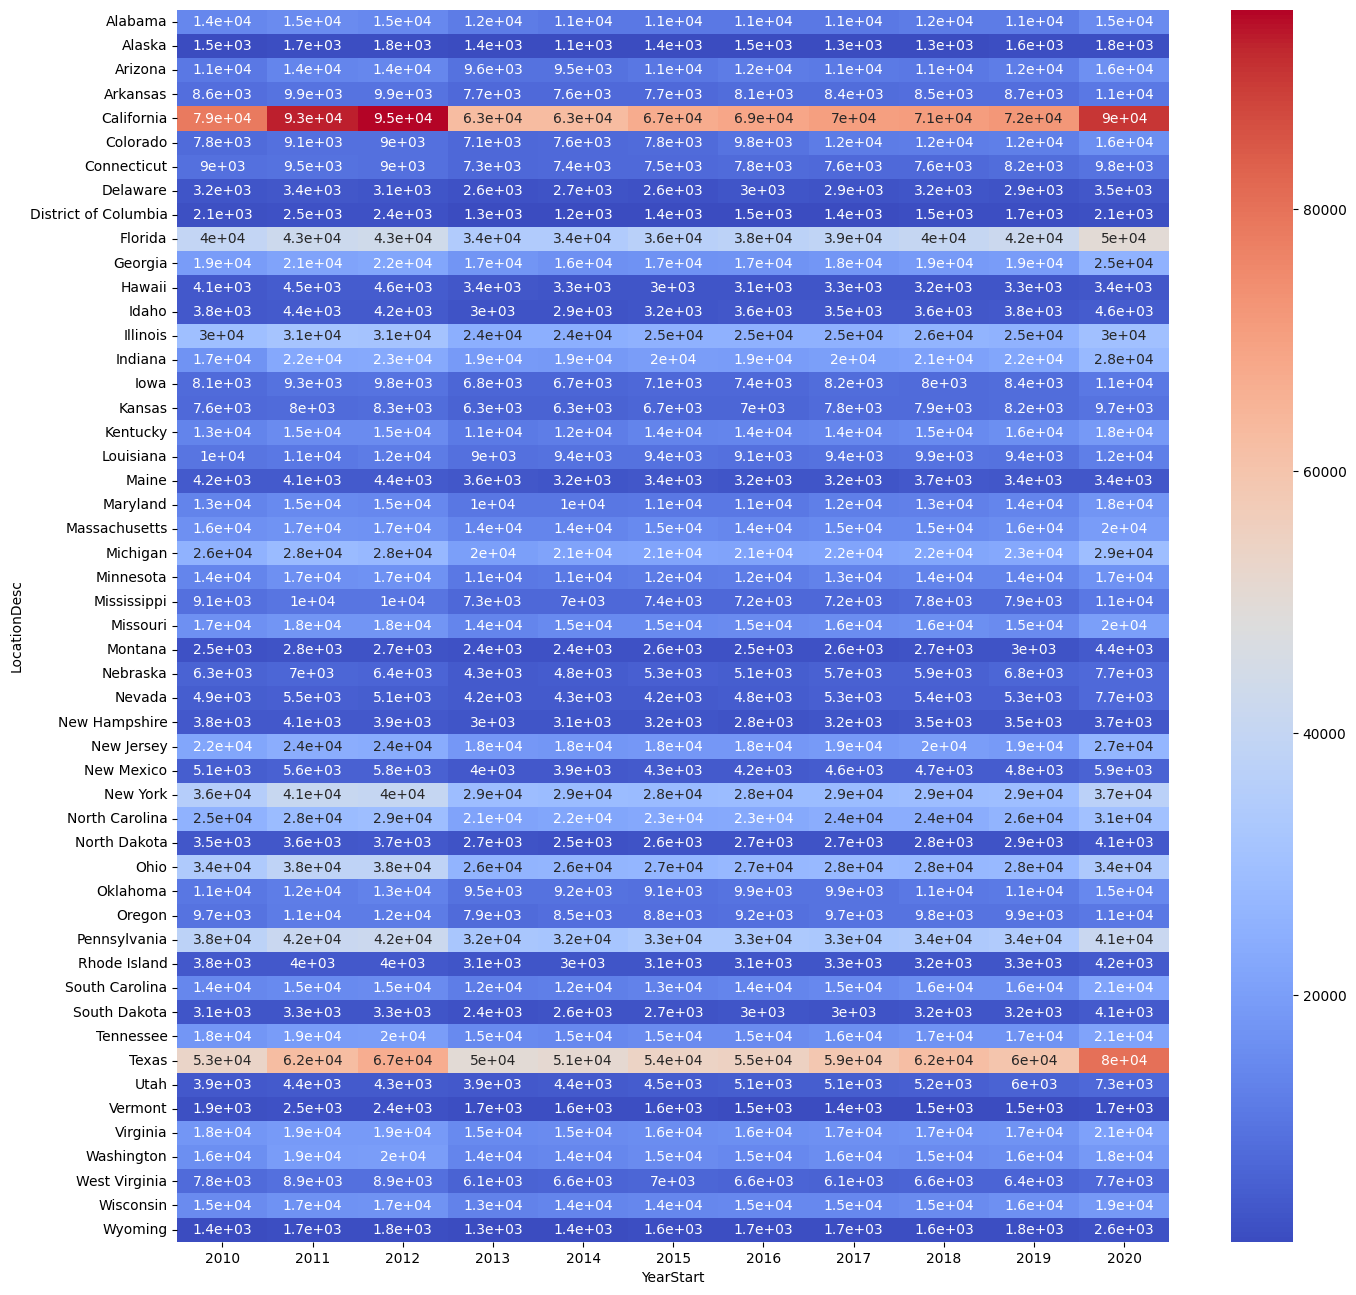

In [ ]:
'''
c. Is there data showing CKD mortality counts state-by-state in the US?
'''
import matplotlib.pyplot as plt
import seaborn as sns

# Filtered out United States since it's showing the total.
# Filtered to show deaths from ckd
dfjson_mod_filter = dfjson_mod[(dfjson_mod['LocationDesc'] != 'United States')  & 
                 (dfjson_mod['Question'] == 'Mortality with end-stage renal disease')]

# Create pivot table
pivot_table = dfjson_mod_filter.pivot_table(index='LocationDesc', columns='YearStart', values='DataValue', aggfunc='sum')

plt.figure(figsize=(16, 16))

sns.heatmap(pivot_table, annot=True, cmap='coolwarm')

plt.show()
